In [1]:
import zipfile
import os

with zipfile.ZipFile(r'C:\Users\deepi\Downloads\archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall(r'C:\Users\deepi\Downloads\olist_data')



In [2]:
import pandas as pd
import os
import glob

data_path = 'C:/Users/deepi/Downloads/olist_data'  
csv_files = glob.glob(data_path + '/*.csv')

dataframes = {}
for file in csv_files:
    name = os.path.basename(file).replace('.csv', '')
    dataframes[name] = pd.read_csv(file)

# Now you can safely access any dataset like:
df = dataframes['olist_orders_dataset']


In [3]:
list(dataframes.keys())


['failed_deliveries_by_city',
 'late_delivery_by_city',
 'olist_customers_dataset',
 'olist_geolocation_dataset',
 'olist_orders_dataset',
 'olist_order_items_dataset',
 'olist_order_payments_dataset',
 'olist_order_reviews_dataset',
 'olist_products_dataset',
 'olist_sellers_dataset',
 'product_category_name_translation']

In [4]:
df = dataframes['olist_orders_dataset']
datetime_cols = [col for col in df.columns if 'date' in col or 'timestamp' in col]
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col])


In [5]:
orders = dataframes['olist_orders_dataset']

# Explicitly convert each timestamp column
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')


In [6]:
orders = dataframes['olist_orders_dataset']
orders['delivery_duration_hrs'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / 3600
orders['wait_time_hrs'] = (orders['order_delivered_customer_date'] - orders['order_approved_at']).dt.total_seconds() / 3600
orders['processing_time_hrs'] = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.total_seconds() / 3600


In [7]:
orders.dtypes[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date']]


order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object

In [8]:
list(dataframes.keys())


['failed_deliveries_by_city',
 'late_delivery_by_city',
 'olist_customers_dataset',
 'olist_geolocation_dataset',
 'olist_orders_dataset',
 'olist_order_items_dataset',
 'olist_order_payments_dataset',
 'olist_order_reviews_dataset',
 'olist_products_dataset',
 'olist_sellers_dataset',
 'product_category_name_translation']

In [9]:
customers = dataframes['olist_customers_dataset']


In [10]:
print(set(customers.columns) & set(geo_grouped.columns))


NameError: name 'geo_grouped' is not defined

In [ ]:
print(customers.columns)


In [10]:
# Renameing column in customers to match with geo
customers = dataframes['olist_customers_dataset'].copy()
customers = customers.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'})

geo = dataframes['olist_geolocation_dataset']
geo_grouped = geo.groupby('geolocation_zip_code_prefix').first().reset_index()
geo_grouped = geo_grouped.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'})

# merge
customers = customers.merge(geo_grouped, on='zip_code_prefix', how='left')

# Add region label
customers['region'] = customers['geolocation_city'] + ', ' + customers['geolocation_state']
print(customers[['zip_code_prefix', 'region']].head())


   zip_code_prefix                     region
0            14409                 franca, SP
1             9790  sao bernardo do campo, SP
2             1151              sao paulo, SP
3             8775        mogi das cruzes, SP
4            13056               campinas, SP


In [11]:
customers['city_region'] = customers['geolocation_city'] + ', ' + customers['geolocation_state']


In [12]:
orders['delivery_duration_hrs'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / 3600


In [13]:
import numpy as np

orders['vehicle_type'] = np.where(orders['delivery_duration_hrs'] < 24, 'Bike', 'Truck')
orders['vehicle_type'] 

0        Truck
1        Truck
2        Truck
3        Truck
4        Truck
         ...  
99436    Truck
99437    Truck
99438    Truck
99439    Truck
99440    Truck
Name: vehicle_type, Length: 99441, dtype: object

In [14]:
print(orders.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_duration_hrs', 'wait_time_hrs', 'processing_time_hrs',
       'vehicle_type'],
      dtype='object')


In [15]:
# Late if delivered after estimated
df['is_late'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']

# Failed if not delivered (NaN)
df['is_failed'] = df['order_delivered_customer_date'].isna()
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration_hrs,wait_time_hrs,processing_time_hrs,vehicle_type,is_late,is_failed
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,202.477778,202.299444,0.178333,Truck,False,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,330.768889,300.055000,30.713889,Truck,False,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,225.461111,225.185000,0.276111,Truck,False,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,317.010000,316.711944,0.298056,Truck,False,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,68.973056,67.942500,1.030556,Truck,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,197.232222,197.232222,0.000000,Truck,False,False
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,532.649444,532.455278,0.194167,Truck,False,False
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,596.626111,596.333611,0.292500,Truck,False,False
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,410.074167,409.942500,0.131667,Truck,False,False


In [16]:
orders = dataframes['olist_orders_dataset']
items = dataframes['olist_order_items_dataset']
payments = dataframes['olist_order_payments_dataset']
reviews = dataframes['olist_order_reviews_dataset']


master_df = orders.merge(items, on='order_id', how='left') \
                  .merge(payments, on='order_id', how='left') \
                  .merge(reviews, on='order_id', how='left')


In [17]:
orders['is_late'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']
print(orders[['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'is_late']].head(10))


                           order_id order_delivered_customer_date  \
0  e481f51cbdc54678b7cc49136f2d6af7           2017-10-10 21:25:13   
1  53cdb2fc8bc7dce0b6741e2150273451           2018-08-07 15:27:45   
2  47770eb9100c2d0c44946d9cf07ec65d           2018-08-17 18:06:29   
3  949d5b44dbf5de918fe9c16f97b45f8a           2017-12-02 00:28:42   
4  ad21c59c0840e6cb83a9ceb5573f8159           2018-02-16 18:17:02   
5  a4591c265e18cb1dcee52889e2d8acc3           2017-07-26 10:57:55   
6  136cce7faa42fdb2cefd53fdc79a6098                           NaT   
7  6514b8ad8028c9f2cc2374ded245783f           2017-05-26 12:55:51   
8  76c6e866289321a7c93b82b54852dc33           2017-02-02 14:08:10   
9  e69bfb5eb88e0ed6a785585b27e16dbf           2017-08-16 17:14:30   

  order_estimated_delivery_date  is_late  
0                    2017-10-18    False  
1                    2018-08-13    False  
2                    2018-09-04    False  
3                    2017-12-15    False  
4                    2018

In [18]:
print("Total late deliveries:", orders['is_late'].sum())


Total late deliveries: 7827


In [19]:
late_pct = orders['is_late'].mean() * 100
print(f"Percentage of late deliveries: {late_pct:.2f}%")


Percentage of late deliveries: 7.87%


In [20]:
orders['is_failed'] = orders['order_delivered_customer_date'].isna()
print(orders[['order_id', 'order_status', 'order_delivered_customer_date', 'is_failed']].head(10))


                           order_id order_status  \
0  e481f51cbdc54678b7cc49136f2d6af7    delivered   
1  53cdb2fc8bc7dce0b6741e2150273451    delivered   
2  47770eb9100c2d0c44946d9cf07ec65d    delivered   
3  949d5b44dbf5de918fe9c16f97b45f8a    delivered   
4  ad21c59c0840e6cb83a9ceb5573f8159    delivered   
5  a4591c265e18cb1dcee52889e2d8acc3    delivered   
6  136cce7faa42fdb2cefd53fdc79a6098     invoiced   
7  6514b8ad8028c9f2cc2374ded245783f    delivered   
8  76c6e866289321a7c93b82b54852dc33    delivered   
9  e69bfb5eb88e0ed6a785585b27e16dbf    delivered   

  order_delivered_customer_date  is_failed  
0           2017-10-10 21:25:13      False  
1           2018-08-07 15:27:45      False  
2           2018-08-17 18:06:29      False  
3           2017-12-02 00:28:42      False  
4           2018-02-16 18:17:02      False  
5           2017-07-26 10:57:55      False  
6                           NaT       True  
7           2017-05-26 12:55:51      False  
8           2017-02-02

In [21]:
print("Total failed deliveries:", orders['is_failed'].sum())


Total failed deliveries: 2965


In [ ]:
failed_pct = orders['is_failed'].mean() * 100
print(f"Percentage of failed deliveries: {failed_pct:.2f}%")


In [ ]:

customers['region'] = customers['geolocation_city'] + ', ' + customers['geolocation_state']
orders = orders.merge(customers[['customer_id', 'region']], on='customer_id', how='left')
print(orders.columns)

In [ ]:
orders.groupby('region')['is_failed'].mean().sort_values(ascending=False).head(10)


In [ ]:
pip install sqlalchemy pyodbc


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import urllib


In [ ]:
params = urllib.parse.quote_plus(
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=localhost;"  
    r"DATABASE=LaDeDB;"
    r"Trusted_Connection=yes;"
)


In [ ]:
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import urllib

# Replace with the correct ODBC driver installed on your system
params = urllib.parse.quote_plus(
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=localhost;"
    r"DATABASE=LaDeDB;"
    r"Trusted_Connection=yes;"
)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# Example: dictionary of DataFrames
tables = {
    "orders": orders,
    "customers": customers,
    'geolocation': geo,
    'order_items': items,
    'payments': payments,
    'reviews': reviews
   
    # Add more if you have more cleaned tables
}

# Upload all tables
for table_name, df in tables.items():
    print(f"Uploading: {table_name}")
    df.to_sql(table_name, engine, if_exists='replace', index=False)



In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [24]:
# Select your features and target
features = ['order_dayofweek', 'order_hour', 'estimated_delivery_days', 'wait_time_hrs', 'processing_time_hrs']
target = 'delivery_duration_days'

X = df[features].fillna(0)
y = df[target]


KeyError: "['order_dayofweek', 'order_hour', 'estimated_delivery_days'] not in index"

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'X' is not defined

In [26]:
# Combine X and y for easy filtering
data = pd.concat([X, y], axis=1)

# Drop rows where target (y) is NaN
data = data.dropna(subset=[y.name])

# Split back to X and y
X = data[X.columns]
y = data[y.name]

# Then proceed with train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



NameError: name 'X' is not defined

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



NameError: name 'X_train' is not defined

In [22]:
y_pred = lr_model.predict(X_test)

print("📊 Linear Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


NameError: name 'lr_model' is not defined

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # y = x line
plt.xlabel("Actual Delivery Duration (days)")
plt.ylabel("Predicted Delivery Duration (days)")
plt.title("Actual vs Predicted Delivery Duration (Linear Regression)")
plt.grid(True)
plt.show()


NameError: name 'y_test' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
df['delivery_status'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']
df['delivery_status'] = df['delivery_status'].astype(int)  # 1 = delayed, 0 = on-time


In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
# Step 1: Use the correct target column
df_model = df.dropna(subset=['late_delivery'])

# Step 2: Define features and target
X = df_model.drop('late_delivery', axis=1)
y = df_model['late_delivery']


In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Drop columns that are IDs or datetime strings
drop_cols = [
    'order_id', 'customer_id', 'order_status',
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

df_model = df.dropna(subset=['late_delivery']).drop(columns=drop_cols)

# Set features and target
X = df_model.drop('late_delivery', axis=1)
y = df_model['late_delivery']


In [ ]:
print(X.dtypes)

In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())


In [ ]:
print(y_train.unique())
print(y_train.value_counts())


In [ ]:
# Convert late_delivery to integer (0 or 1)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values if any
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Make sure target is int
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

metrics_lr = model_metrics(y_test, y_pred_lr)
metrics_rf = model_metrics(y_test, y_pred_rf)

import pandas as pd

# Create comparison table
model_comparison = pd.DataFrame([metrics_lr, metrics_rf], index=["Logistic Regression", "Random Forest"])
model_comparison


C:\Users\deepi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\deepi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\deepi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


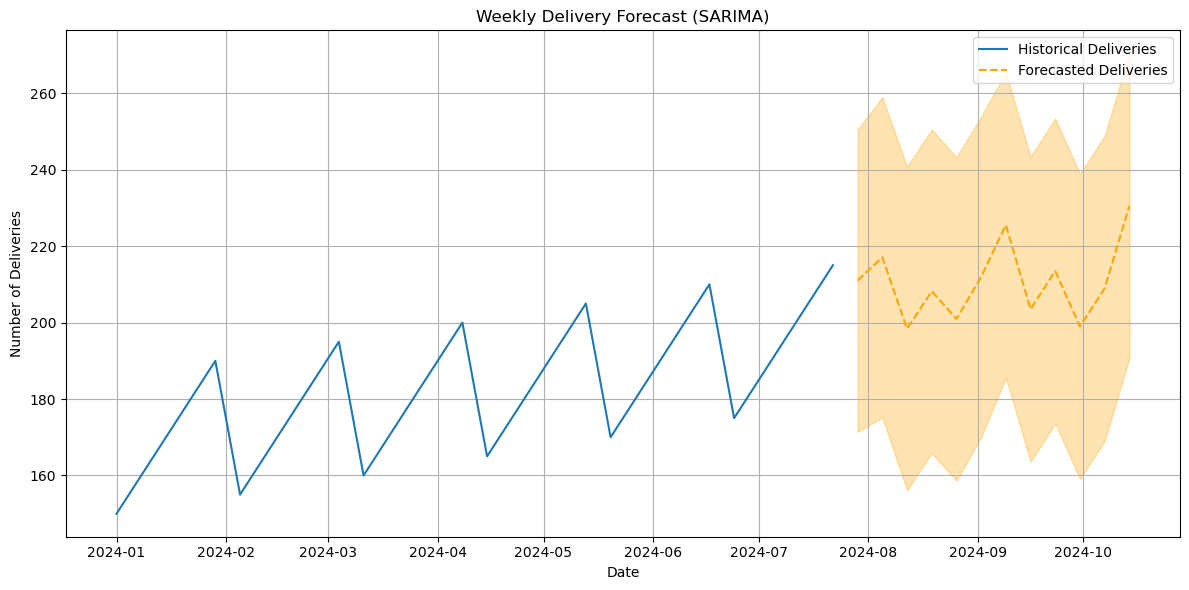

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Simulate weekly delivery data (replace with actual weekly data)
date_range = pd.date_range(start='2024-01-01', periods=30, freq='W-MON')
sample_deliveries = pd.Series([150 + (i % 5)*10 + (i//5)*5 for i in range(30)], index=date_range)

# Fit SARIMA model
model = SARIMAX(sample_deliveries, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast next 12 weeks
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=sample_deliveries.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W-MON')
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
conf_int.index = forecast_index

# Plot the forecast with confidence interval
plt.figure(figsize=(12,6))
plt.plot(sample_deliveries, label='Historical Deliveries')
plt.plot(forecast_index, forecast_mean, label='Forecasted Deliveries', color='orange', linestyle='--')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)

plt.title('Weekly Delivery Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# 3. Drop rows with missing target
df_model = df_model.dropna(subset=['late_delivery'])
df_model

In [ ]:
X = df_model.drop('late_delivery', axis=1)
y = df_model['late_delivery']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Remove rows with any missing values
df_cleaned = df.dropna()
df_cleaned

In [ ]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # keep labels aligned

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [ ]:
# 6. Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


In [ ]:
# 7. Predictions
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]


In [ ]:
import matplotlib.ticker as mtick

# Step 1: Create readable labels if needed
feature_labels = {
    'processing_time_hrs': 'Processing Time (hrs)',
    'wait_time_hrs': 'Wait Time (hrs)',
    'delivery_duration_hrs': 'Delivery Duration (hrs)',
    'delivery_duration_days': 'Delivery Duration (days)',
    'estimated_delivery_days': 'Estimated Delivery (days)',
    'order_dayofweek': 'Order Day of Week',
    'order_hour': 'Order Hour'
}

# Step 2: Map feature names to readable labels
renamed_features = [feature_labels.get(col, col) for col in X.columns]

# Step 3: Get feature importances and convert to percentage
importances = pd.Series(rf_model.feature_importances_, index=renamed_features) * 100

# Step 4: Plot
ax = importances.sort_values().plot(kind='barh', figsize=(10,6), color='blue')
plt.title("Feature Importance")
plt.xlabel(" total")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Step 5: Format x-axis to remove decimals (show whole %)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

plt.tight_layout()
plt.show()


In [11]:
df['predicted'] = model.predict(X_test)
area_risk = df.groupby('region')['predicted'].mean().sort_values(ascending=False)


NameError: name 'model' is not defined